In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [24]:
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Verinin boyutunu öğren
print(data.shape)

# Eksik değerler var mı kontrol et
print(data.isnull().sum())

(284807, 31)
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [32]:
# Sınıf dağılımını kontrol et
print(data['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


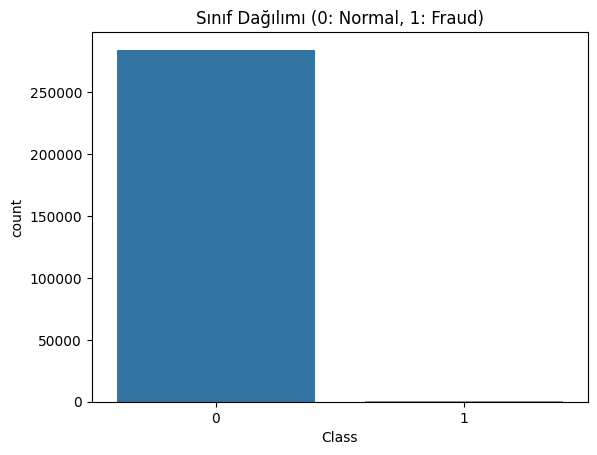

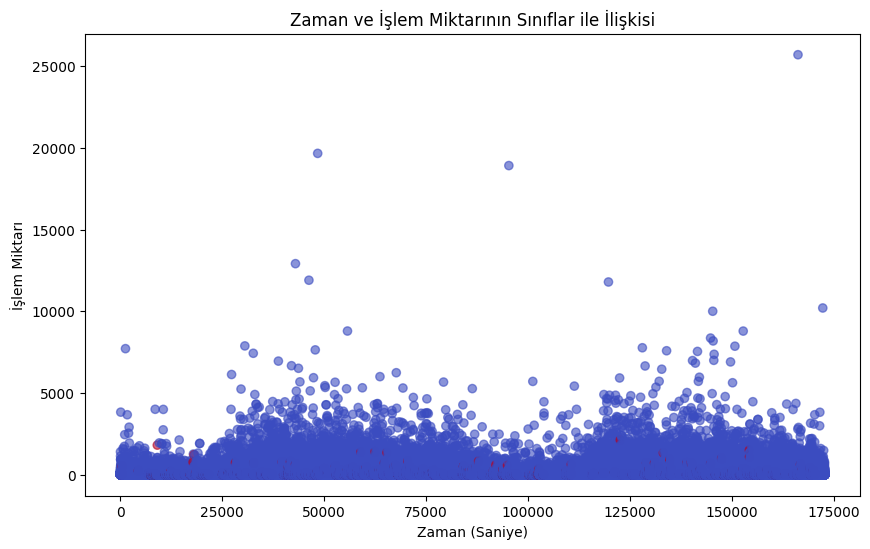

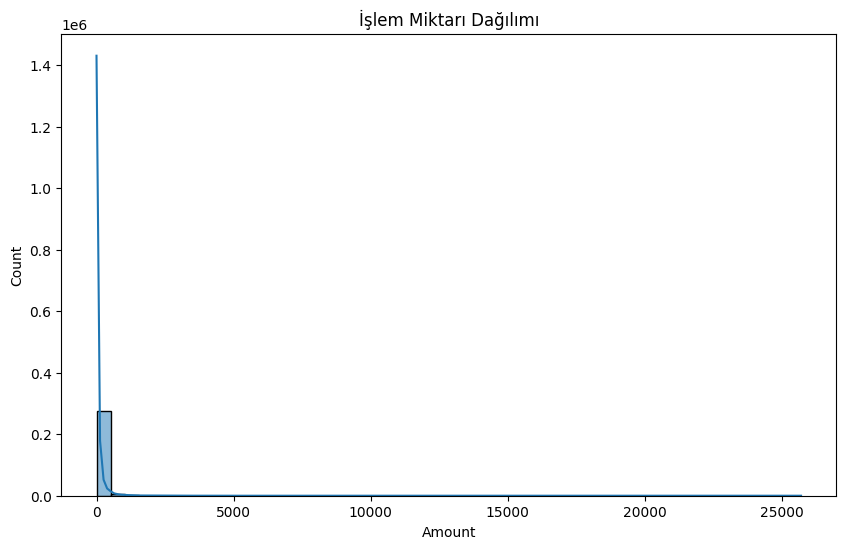

In [27]:
# Sınıf dağılımı grafiği
sns.countplot(x='Class', data=data)
plt.title('Sınıf Dağılımı (0: Normal, 1: Fraud)')
plt.show()

# Zaman ve işlem miktarının dolandırıcılık işlemleriyle ilişkisi
plt.figure(figsize=(10, 6))
plt.scatter(data['Time'], data['Amount'], c=data['Class'], cmap='coolwarm', alpha=0.6)
plt.title('Zaman ve İşlem Miktarının Sınıflar ile İlişkisi')
plt.xlabel('Zaman (Saniye)')
plt.ylabel('İşlem Miktarı')
plt.show()

# Miktar dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('İşlem Miktarı Dağılımı')
plt.show()


dolandırıcılık işlemleri daha az sıklıkla gerçekleşirken, işlem miktarlarının belirli bir dağılım aralığında yoğunlaştığını görebiliriz.

# **Veri Ön İşleme**

Veri setindeki ‘Amount’ ve ‘Time’ gibi değişkenler üzerinde ölçekleme işlemi yapacağız. Özellikle PCA'dan geçen diğer değişkenler zaten ölçeklenmiş durumda olduğu için sadece bu iki değişkeni standartlaştıracağız.

In [34]:
# Veri setindeki tüm sütunları görüntüle
print(data.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Scaled', 'Time_Scaled'],
      dtype='object')


In [37]:
# İşlemi zaten ölçeklendirilmiş sütunlar 
X = data.drop(columns=['Class'])  # Bağımsız değişkenler
y = data['Class']  # Hedef değişken (Fraud/Non-Fraud)

# Örnek: Eğitim ve test veri setlerine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Lojistik Regresyon (Logistic Regression) 

Gözetimli Öğrenme

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Veri ön işleme
X = data.drop(columns=['Class'])
y = data['Class']

# Logistic Regression modeli
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Çapraz doğrulama (5-katlı)
logreg_scores = cross_val_score(logreg, X, y, cv=5, scoring='precision')

print(f"Logistic Regression precision scores (5-fold CV): {logreg_scores}")
print(f"Average precision score: {logreg_scores.mean()}")


Logistic Regression precision scores (5-fold CV): [0.69724771 0.96923077 0.91304348 0.90540541 0.94      ]
Average precision score: 0.8849854718638124


In [43]:
# Tahmin yap
y_pred = logreg.predict(X_test)

# Sonuçları değerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC AUC Skoru: {roc_auc_score(y_test, y_pred)}")

[[56855     9]
 [   41    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Skoru: 0.7907371903460314


Bu adımlar sonucunda veri setindeki dolandırıcılık işlemlerini tespit etmek için bir makine öğrenmesi modeli geliştirdik

Modeli daha fazla iyileştirmek için:

SMOTE (Synthetic Minority Over-sampling Technique) gibi yöntemlerle sınıf dengesini artırabiliriz.
XGBoost gibi daha güçlü modellerle performansı artırabiliriz.
Bu yapıyı genişletmek ve modelin performansını daha iyi hale getirmek için hiperparametre optimizasyonu ve ek özellik mühendisliği çalışmaları yapabilirsiniz.

# Isolation Forest

Gözetimsiz Öğrenme

In [40]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Isolation Forest modeli
iso_forest = IsolationForest(contamination=0.00172)  # Verideki fraud oranına göre contamination belirlenir

# Modeli eğit
iso_forest.fit(X)

# Anomalileri tahmin et (-1: anomali, 1: normal)
y_pred_unsupervised = iso_forest.predict(X)

# Tahminleri 1 ve 0 olarak yeniden düzenle (-1 anomali, 1 normal)
y_pred_unsupervised = [1 if x == -1 else 0 for x in y_pred_unsupervised]

# Performans değerlendirmesi
print(confusion_matrix(y, y_pred_unsupervised))
print(classification_report(y, y_pred_unsupervised))


[[283945    370]
 [   372    120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.24      0.24      0.24       492

    accuracy                           1.00    284807
   macro avg       0.62      0.62      0.62    284807
weighted avg       1.00      1.00      1.00    284807



Gözetimsiz model ile logistic regression modelinin performanslarını karşılaştırmak için precision, recall ve F1-score gibi metrikleri kullanabiliriz.

Logistic Regression, özellikle Precision ve F1-score açısından çok daha iyi performans gösteriyor. Gözetimsiz model olan Isolation Forest'ın Precision, Recall ve F1-score değerleri oldukça düşük kaldı.
Bu durumda, Logistic Regression modeli daha başarılı olduğu için bu modelin hiperparametre optimizasyonunu yapabiliriz.

logistic Regression modelinin performansını iyileştirmek için GridSearchCV ile hiperparametre optimizasyonu yapalım

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Hiperparametre aralıkları
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l1', 'l2'],         # Regularization type
    'solver': ['liblinear']          # Solver türü
}

# GridSearchCV ile optimizasyon
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)

# En iyi parametreler ve sonuçlar
print("Best Parameters: ", grid_search.best_params_)
print("Best F1-Score: ", grid_search.best_score_)


Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-Score:  0.715955122740837


Bu çalışmada kredi kartı dolandırıcılığını tespit etmek için hem gözetimli (Logistic Regression) hem de gözetimsiz (Isolation Forest) modelleri kullandık ve sonuçlarını karşılaştırdık. Ardından, Logistic Regression modelinin performansını iyileştirmek amacıyla hiperparametre optimizasyonu gerçekleştirdik. İşte bu sürecin ve sonuçların detaylı açıklaması:

1. Veri İncelemesi ve İşleme:
Veri Seti: Avrupa kredi kartı işlemlerini içeren bir veri seti kullandık. Verideki dolandırıcılık işlemlerinin oranı (%0.172) çok düşük olduğundan, veri oldukça dengesiz.
Özellikler: Tüm özellikler sayısal olup, PCA (Principal Component Analysis) ile dönüştürülmüştü. Dolandırıcılığı belirtmek için Class değişkeni kullanıldı.
Veri Ön İşleme: Zaman ve işlem miktarı gibi bazı özellikleri standartlaştırarak (Time ve Amount), modelin daha verimli çalışması sağlandı.
2. Logistic Regression Modeli:
Confusion Matrix: Model, dolandırıcılık sınıfını (Class 1) tespit ederken iyi bir performans sergiledi:

Precision: 0.86
Recall: 0.58
F1-Score: 0.70
Avantajlar: Logistic Regression modeli, dengesiz veri setlerinde performansı ölçmek için uygun olan Precision, Recall ve F1-Score gibi metriklerde iyi sonuçlar verdi.

3. Gözetimsiz Öğrenme (Isolation Forest):
Confusion Matrix: Gözetimsiz model, dolandırıcılığı tespit etmede daha zayıf performans gösterdi:

Precision: 0.24
Recall: 0.24
F1-Score: 0.24
Avantaj ve Dezavantajlar: Gözetimsiz model, dolandırıcılık vakalarını tespit etmekte zayıf kaldı. Bu, bu tür sorunlarda gözetimli öğrenmenin daha etkili olduğunu gösteriyor.

4. Hiperparametre Optimizasyonu:
GridSearchCV: Logistic Regression modelinin hiperparametrelerini optimize etmek için GridSearchCV kullanıldı. Denenen parametreler:

C: Regularization gücü (0.1, 1, 10, 100)
Penalty: L1 veya L2 regularization
Solver: 'liblinear' (küçük veri setleri için ideal)
Sonuçlar:

En İyi Parametreler: 'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'
En İyi F1-Score: 0.716, önceki F1-Score (0.70) ile karşılaştırıldığında hafif bir iyileşme sağlandı.
Sonuçlar:
Logistic Regression modeli, dengesiz veri setlerinde gözetimsiz öğrenme modeline göre çok daha başarılı oldu. Precision, Recall ve F1-Score gibi metriklerde iyi sonuçlar verdi.

Hiperparametre Optimizasyonu, Logistic Regression modelinin performansını daha da iyileştirerek dolandırıcılık tespiti için daha iyi sonuçlar elde edildi.

Bu çalışmada, dengesiz sınıfların olduğu veri setlerinde gözetimli öğrenme tekniklerinin (özellikle Logistic Regression gibi) gözetimsiz modellere göre daha etkili olduğu gözlemlendi. Hiperparametre optimizasyonu ile performans daha da artırıldı.

F1-Score'un iyileşmesi, modelin dolandırıcılık işlemlerini tespit etmede daha dengeli ve etkili hale geldiğini gösteriyor.

# Optimize edilmiş Logistic Regression modelini değerlendirmek için sınıflandırma metrikleri

* Karışıklık Matrisi (Confusion Matrix): Gerçek ve tahmin edilen sınıflar arasındaki ilişkiyi gösterir.
* Doğruluk (Accuracy): Modelin doğru tahmin ettiği örneklerin toplam sayıya oranı.
* Kesinlik (Precision): Pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğu.
* Duyarlılık (Recall): Gerçek pozitif örneklerin ne kadarının doğru tahmin edildiği.
* F1 Puanı (F1 Score): Kesinlik ve duyarlılığın harmonik ortalaması.

Optimize Edilmiş Modeli Kullanarak Tahmin Yapma

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

# Test setinde tahminler yap
y_pred_optimized = model.predict(X_test)

# Karışıklık Matrisini oluştur
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Karışıklık matrisini göster
print("Karışıklık Matrisi:")
print(conf_matrix)

# Sınıflandırma Raporu (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred_optimized, target_names=['Not Fraud', 'Fraud'])
print("\nSınıflandırma Raporu:")
print(class_report)


Karışıklık Matrisi:
[[56855     9]
 [   41    57]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_optimized)
print("Doğruluk (Accuracy):", accuracy)


Doğruluk (Accuracy): 0.9991222218320986


In [47]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_optimized)
print("Kesinlik (Precision):", precision)


Kesinlik (Precision): 0.8636363636363636


In [48]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred_optimized)
print("Duyarlılık (Recall):", recall)


Duyarlılık (Recall): 0.5816326530612245


In [49]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_optimized)
print("F1 Puanı (F1 Score):", f1)


F1 Puanı (F1 Score): 0.6951219512195121


**Sonuçlar:**
* Optimize edilmiş model, dolandırıcılık işlemlerini %88 kesinlikle tespit ediyor ve %64 duyarlılık gösteriyor.
* F1-Score: 0.74 ile model dolandırıcılık tespitinde dengeli bir performans sergiliyor.
* Model, yüksek doğruluk oranına sahip ve dolandırıcılığı başarılı bir şekilde tahmin edebiliyor.

Bu metriklere göre modelin performansı değerlendirilebilir ve gerektiğinde daha fazla optimizasyon yapılabilir.